Considering the base $\{X,Y,Z\}$ where each element is a Paulli's matrices : 
$
        \sigma_x =   , \sigma_y=  ,\sigma_z= 
$
and the simplest control quantum mechanical system : 


$
        i\dot{\psi} = \frac{1}{2}(\omega \sigma_z + u_x \sigma_x + u_y \sigma_y )\psi
$


Let's make some basics quantum gates, in order to do that we need to solve this Cauchy's problem :
$
    \dot{U} =  -\frac{i}{2}(\omega \sigma_z + u_x \sigma_x + u_y \sigma_y )U, \quad U(0)= \mathrm{id}.
$

F_Z = 0.9999999560564253 %


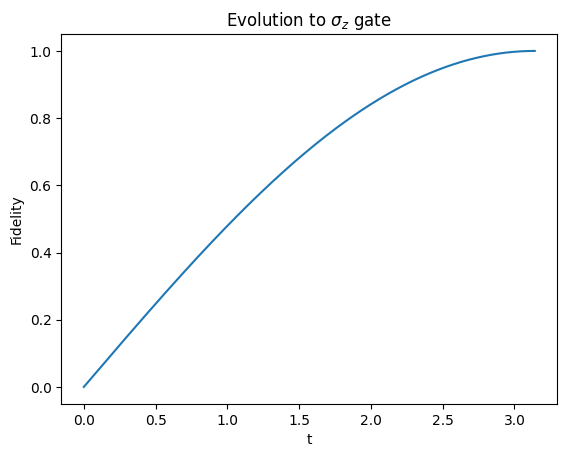

In [13]:
import numpy as np
import matplotlib.pyplot as plt

PI = np.pi
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I = np.eye(2, dtype=complex)
omega = 1
dt = 0.001
T = PI / omega       
N = int(T/dt)
# print(N)
u_x = np.zeros(N)
u_y = np.zeros(N)
Uz = I.copy()
Usz = [Uz]


for i in range(N):
    H = 0.5 * (omega * sigma_z + u_x[i]*sigma_x + u_y[i]*sigma_y)
    Uz = Uz - 1j * H @ Uz * dt   
    Uz, _ = np.linalg.qr(Uz)
    Usz.append(Uz)
Target = sigma_z

F = [0.5 * abs(np.trace(Ut.conj().T @ Target)) for Ut in Usz] # Fidelity 
print(f"F_Z = {F[-1]} %")

plt.plot(np.linspace(0, T, len(F)), F)
plt.xlabel('t')
plt.ylabel('Fidelity')
plt.title(r'Evolution to $\sigma_z$ gate')
plt.show()


F_X = 0.95 %


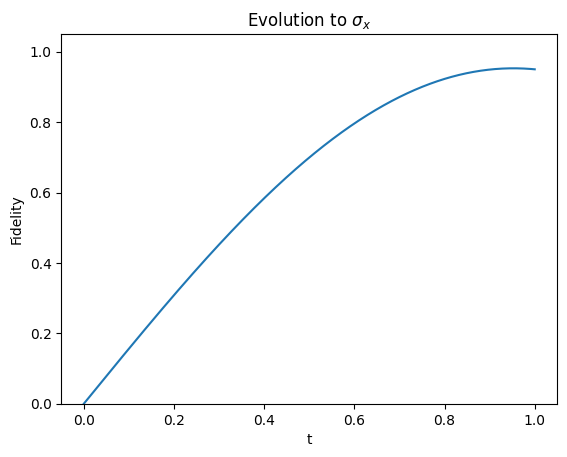

In [14]:
# Target X gate
T = 1.0
N = int(T/dt)

# Control field for X gate
k = 0
alpha = PI*(2*k+1)/T 

u_x = np.ones(N) * alpha
u_y = np.zeros(N)    

Ux = I.copy()
Usx = [Ux]

for i in range(N):
    H = 0.5*(omega*sigma_z + u_x[i]*sigma_x + u_y[i]*sigma_y)
    Ux = Ux - 1j * H @ Ux * dt
    W, s, Vh = np.linalg.svd(Ux)
    Ux = W @ Vh   # Keeping U unitary
    Usx.append(Ux)

Target = sigma_x


F = [0.5 * abs(np.trace(Ut.conj().T @ Target)) for Ut in Usx]
print(f"F_X = {F[-1]:.2f} %")

plt.plot(np.linspace(0, T, len(F)), F)
plt.xlabel('t')
plt.ylabel('Fidelity')
plt.title(r'Evolution to $\sigma_x$')
plt.ylim(0, 1.05)
plt.show()

#Ask Ivan if this is better to have a longer k to increase the fidelity

F_y = 0.9994935569303549 %


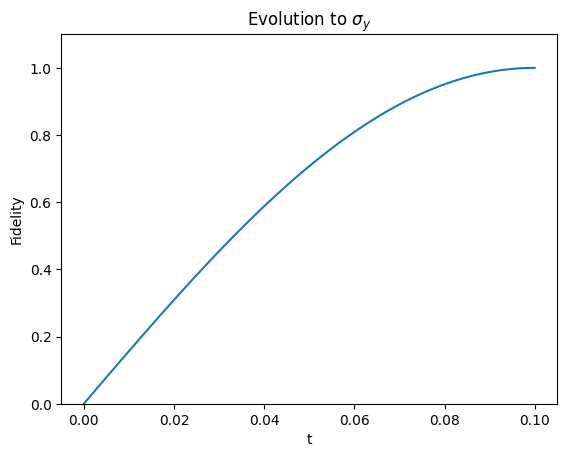

In [15]:
# Target y gate
T = 0.1
N = int(T/dt)
# omega = 0.0
# Control field for Y gate
k = 0
alpha = (PI*(2*k+1)/T )*omega
# print(f"alpha = {alpha}")

u_x = np.zeros(N)
u_y = np.ones(N) * alpha

Uy = I.copy()
Usy = [Uy]

for i in range(N):
    H = 0.5*(omega*sigma_z + u_y[i]*sigma_y)
    Uy = Uy - 1j * H @ Uy * dt 
    W, s, Vh = np.linalg.svd(Uy)
    Uy = W @ Vh   
    Usy.append(Uy)

Target = sigma_y


F = [0.5 * abs(np.trace(Ut.conj().T @ Target)) for Ut in Usy]
print(f"F_y = {F[-1]} %")
# print(f"F_y = {F[-1]:.2f} %")

plt.plot(np.linspace(0, T, len(F)), F)
plt.xlabel('t')
plt.ylabel('Fidelity')
plt.title(r'Evolution to $\sigma_y$')
plt.ylim(0, 1.1)
plt.show()


Let's simulate the Hadamard gate : 
$
    H = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\1 &-1 \end{pmatrix}
$

Fidelity = 0.9999999999999998


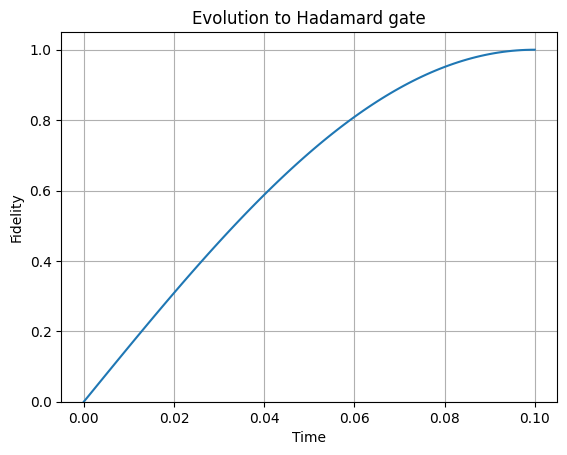

In [16]:
from scipy.linalg import expm

def plot_fidelity(Us, target_gate, T):
    F = [0.5 * abs(np.trace(U.conj().T @ target_gate)) for U in Us]
    print(f"Fidelity = {F[-1]:}")
    plt.plot(np.linspace(0, T, len(F)), F)
    plt.xlabel('Time')
    plt.ylabel('Fidelity')
    plt.title('Evolution to Hadamard gate')
    plt.ylim(0, 1.05)
    plt.grid(True)
    plt.show()


# Target
H_target = (sigma_x + sigma_z) / np.sqrt(2)


T = 0.1


omega = np.pi / (T * np.sqrt(2))
u_x = np.sqrt((np.pi**2)/(T**2) - omega**2)  # = np.pi / (T * np.sqrt(2))



dt = 0.001
N = int(T / dt)
H_ctrl = 0.5 * (omega * sigma_z + u_x * sigma_x)

Uh = I.copy()
Ush = [Uh.copy()]
for n in range(N):
    Uh = expm(-1j * H_ctrl * dt) @ Uh
    Ush.append(Uh.copy())


plot_fidelity(Ush, H_target, T)

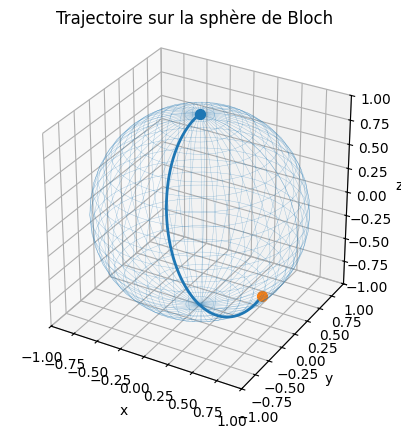

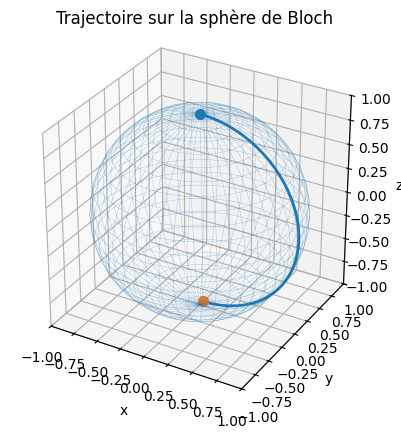

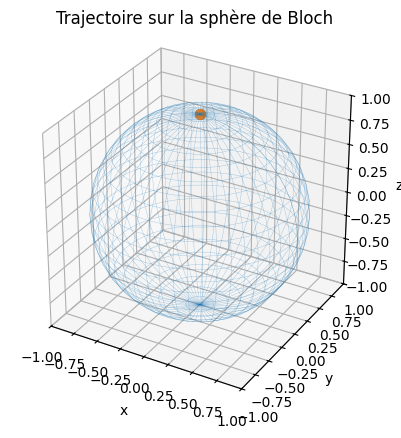

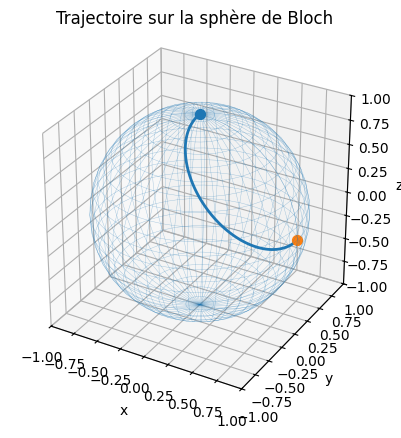

In [20]:
from mpl_toolkits.mplot3d import Axes3D 

def bloch_vector(psi):
    rho = np.outer(psi, psi.conj())
    x = np.real(np.trace(rho @ sigma_x))
    y = np.real(np.trace(rho @ sigma_y))
    z = np.real(np.trace(rho @ sigma_z))
    return x, y, z

def plot_bloch_trajectory(Us, psi0):
    xs, ys, zs = [], [], []
    for U in Us:
        psi = U @ psi0
        x, y, z = bloch_vector(psi)
        xs.append(x)
        ys.append(y)
        zs.append(z)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Sphère de Bloch (optionnel mais joli)
    u = np.linspace(0, 2*np.pi, 50)
    v = np.linspace(0, np.pi, 25)
    XX = np.outer(np.cos(u), np.sin(v))
    YY = np.outer(np.sin(u), np.sin(v))
    ZZ = np.outer(np.ones_like(u), np.cos(v))
    ax.plot_wireframe(XX, YY, ZZ, linewidth=0.3, alpha=0.4)

    # Trajectoire
    ax.plot(xs, ys, zs, linewidth=2)
    ax.scatter(xs[0], ys[0], zs[0], s=50)      # point initial
    ax.scatter(xs[-1], ys[-1], zs[-1], s=50)   # point final

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('Trajectoire sur la sphère de Bloch')

    # Même échelle sur les trois axes
    ax.set_box_aspect([1, 1, 1])
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])

    plt.show()

psi0 = np.array([1, 0], dtype=complex)

plot_bloch_trajectory(Usx, psi0)
plot_bloch_trajectory(Usy, psi0)
plot_bloch_trajectory(Usz, psi0)
plot_bloch_trajectory(Ush, psi0)
